In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #импортируем библиотеку pandas для обработки dataframe-ов
import random
pd.options.mode.chained_assignment = None 

Читаем CSV с основными данными

In [2]:
df = pd.read_csv('homicide-data.csv', encoding="unicode_escape")
df

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest
2,Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest
3,Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest
4,Alb-000005,20100102,MULA,VIVIAN,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest
...,...,...,...,...,...,...,...,...,...,...,...,...
52174,Was-001380,20160908,WILLIAMS,EVAN,Black,29,Male,Washington,DC,38.828704,-77.002075,Closed by arrest
52175,Was-001381,20160913,SMITH,DEON,Black,19,Male,Washington,DC,38.822852,-77.001725,Open/No arrest
52176,Was-001382,20161114,WASHINGTON,WILLIE,Black,23,Male,Washington,DC,38.828025,-77.002511,Open/No arrest
52177,Was-001383,20161130,BARNES,MARCUS,Black,24,Male,Washington,DC,38.820476,-77.008640,Open/No arrest


Построим круговую диаграмму с распределением жертв по расе.

In [3]:
unknown_race_count = df.query("victim_race == 'Unknown'").count()['uid']
black_race_count = df.query("victim_race == 'Black'").count()['uid']
white_race_count = df.query("victim_race == 'White'").count()['uid']
hispanic_race_count = df.query("victim_race == 'Hispanic'").count()['uid']
asian_race_count = df.query("victim_race == 'Asian'").count()['uid']
other_race_count = df.query("victim_race == 'Other'").count()['uid']

In [4]:
vals = [unknown_race_count, black_race_count, white_race_count, hispanic_race_count, asian_race_count, other_race_count]
labels = ["Unknown", "Black", "White", "Hispanic", "Asian", "Other"]
explode = (0, 0.15, 0.1, 0, 0, 0)

(-1.2413517061726107,
 1.1067310357803866,
 -1.2143112456560534,
 1.206471399588149)

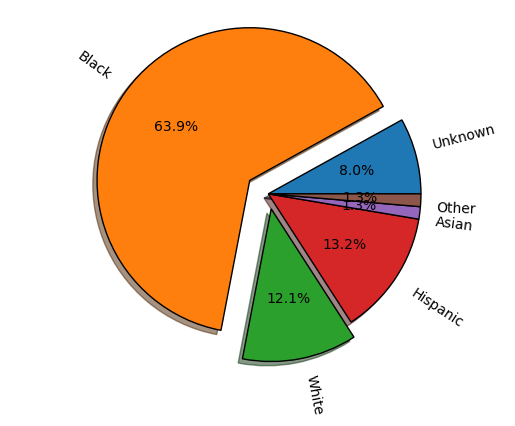

In [5]:
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow = True, explode =
explode, wedgeprops = {'lw':1, 'ls':'-', 'edgecolor':'k'},
rotatelabels=True)
ax.axis('equal')

Построим ящик с усами для оценки распределения возраста жертв в зависисимости от их расы.

In [6]:
unknown_race_age = df.query("victim_race == 'Unknown' & victim_age != 'Unknown'")['victim_age'].astype('float').to_numpy()
black_race_age = df.query("victim_race == 'Black' & victim_age != 'Unknown'")['victim_age'].astype('float').to_numpy()
white_race_age = df.query("victim_race == 'White' & victim_age != 'Unknown'")['victim_age'].astype('float').to_numpy()
hispanic_race_age = df.query("victim_race == 'Hispanic' & victim_age != 'Unknown'")['victim_age'].astype('float').to_numpy()
asian_race_age = df.query("victim_race == 'Asian' & victim_age != 'Unknown'")['victim_age'].astype('float').to_numpy()
other_race_age = df.query("victim_race == 'Other' & victim_age != 'Unknown'")['victim_age'].astype('float').to_numpy()

In [7]:
data_ages_races = [unknown_race_age, black_race_age, white_race_age, hispanic_race_age, asian_race_age, asian_race_age] 

C:\Users\User\AppData\Local\Temp\ipykernel_24040\4163589408.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Unknown', 'Black', 'White', 'Hispanic', 'Asian', 'Other'])


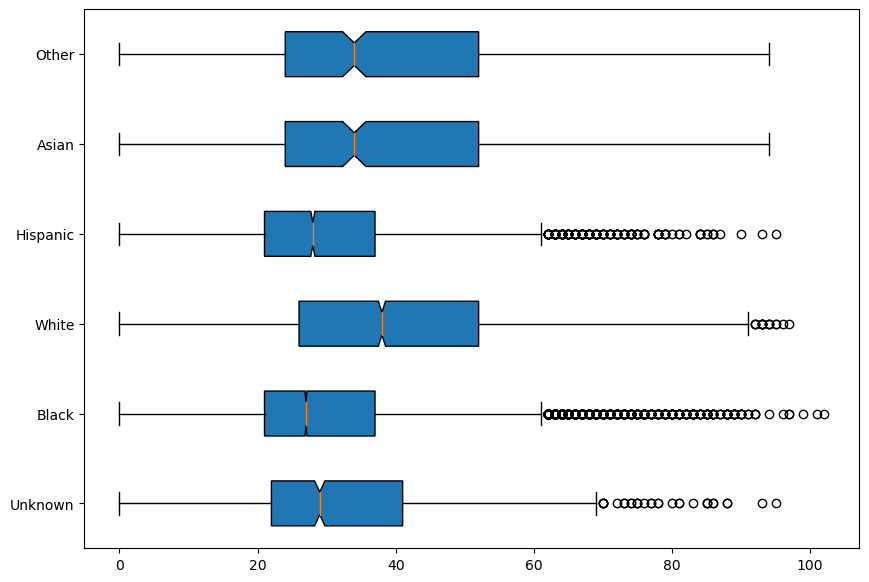

In [8]:
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_subplot(111)  
ax.set_yticklabels(['Unknown', 'Black', 'White', 'Hispanic', 'Asian', 'Other']) 
bp = ax.boxplot(data_ages_races, patch_artist = True, notch ='True', vert = 0)

Построим распределение по широте и долготе

In [9]:
x_lat = df['lat'].astype('float').to_numpy()
y_lon = df['lon'].astype('float').to_numpy()

In [10]:
colors_race = []
for i in df['victim_race']:
    if i == 'Black':
        colors_race.append('black')
    elif i == 'White':
        colors_race.append('yellow')
    elif i == 'Asian':
        colors_race.append('green')
    elif i == 'Hispanic':
        colors_race.append('orange')
    elif i == 'Other': 
        colors_race.append('red')
    else:
        colors_race.append('purple')

Text(0, 0.5, 'долгота')

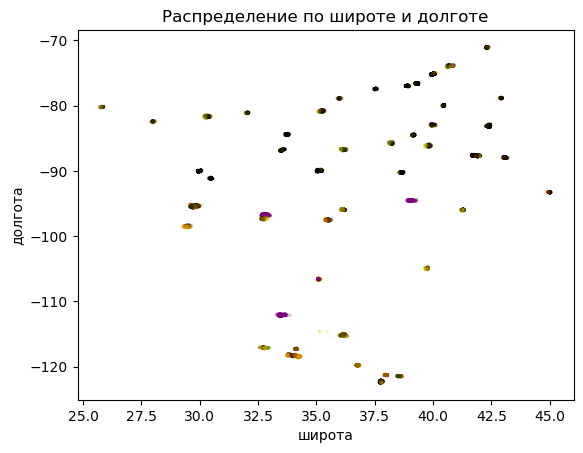

In [11]:
plt.scatter(x_lat, y_lon, s=3, alpha=0.05, c=colors_race)
plt.title('Распределение по широте и долготе')
plt.xlabel('широта')
plt.ylabel('долгота') 

Точками разных цветов - показать жертвы разных рас

Построю пузырьковую диаграмму для оценки количества жертв в каждом городе. Размер пузырька зависит от количества жертв в этом городе. X, y и цвета выбраны случайным образом.

In [12]:
unique_cities = df['city'].unique()
city_count = []
for i in unique_cities:
    city_count.append(df.pivot_table(index = ['city'], aggfunc ='size')[i])

In [13]:
x = np.random.rand(50)
y = np.random.rand(50)
z = city_count
colors = np.random.rand(50) 

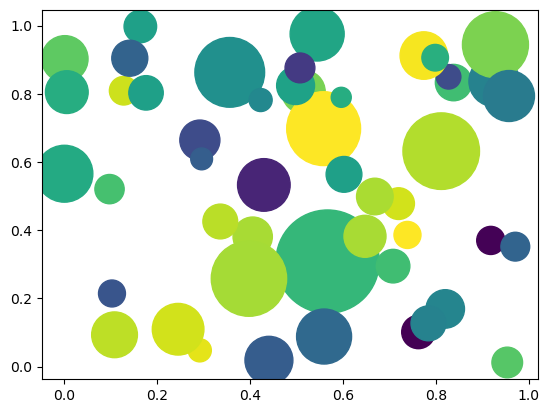

In [14]:
plt.scatter(x, y, s=z,c=colors)

Задание из методички.

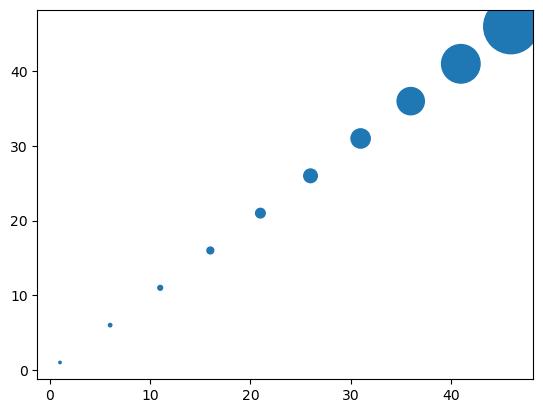

[3, 6, 12, 24, 48, 96, 192, 384, 768, 1536]

In [15]:
x = range(1, 50, 5)
y = range(1, 50, 5)
s = [3*2**n for n in range(len(x))]
plt.scatter(x,y,s=s)
plt.show()
s

Построю круговую диаграмму с распеределением жертв по штатам - чтобы понять где потенциально опаснее всего жить.

In [16]:
unique_states = df['state'].unique()
states_count = {}
for i in unique_states:
    states_count[i] = (df.pivot_table(index = ['state'], aggfunc ='size')[i])

In [17]:
states_count
sorted_states_count = sorted(states_count.items(), key=lambda item: item[1])
sorted_states_dict = {}
for key, value in sorted_states_count:
    sorted_states_dict[key] = float(value)

([<matplotlib.patches.Wedge at 0x1edf96ce160>,
 [Text(1.0998059260112163, 0.020662166164544866, 'CO'),
  Text(1.0980465031239488, 0.06552768100023319, 'MN'),
  Text(1.0940107201773905, 0.11463221247514735, 'NM'),
  Text(1.0873531411886574, 0.16632241685100513, 'NE'),
  Text(1.077581311817188, 0.22094912632175878, 'VA'),
  Text(1.0622479566645067, 0.285708380279754, 'KY'),
  Text(1.0390698852505655, 0.361017691485302, 'MA'),
  Text(1.0045818858743278, 0.4481241285326858, 'AL'),
  Text(0.953041604422294, 0.5492828963659616, 'AZ'),
  Text(0.8850196310493945, 0.6532535898540427, 'NC'),
  Text(0.7965850873478911, 0.7585856567421723, 'wI'),
  Text(0.6861642045700349, 0.8597550141562255, 'NY'),
  Text(0.557096723267382, 0.94849525087095, 'GA'),
  Text(0.41016703495232937, 1.0206679202553663, 'OK'),
  Text(0.24751176419436816, 1.0717919231760387, 'IN'),
  Text(0.07296362908865284, 1.097577472814659, 'DC'),
  Text(-0.10735129156815616, 1.094749149439564, 'NV'),
  Text(-0.312380357956664, 1.0547

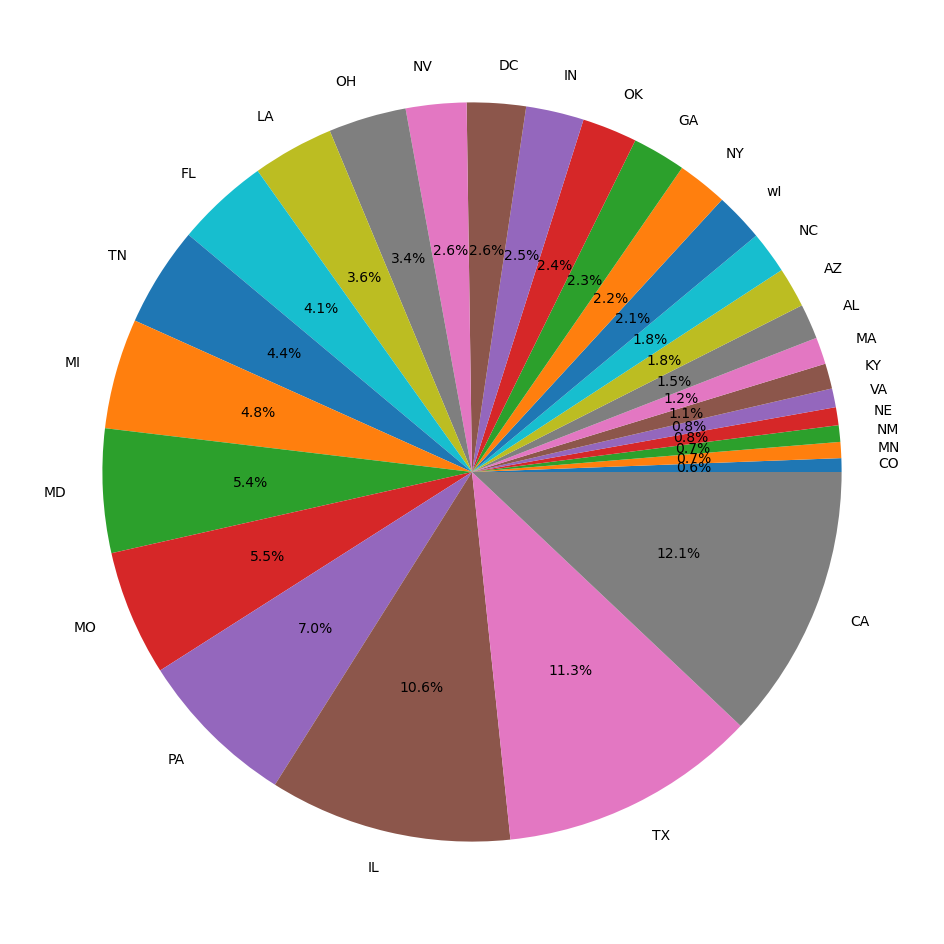

In [18]:
plt.figure(figsize=(12,12))
plt.pie(sorted_states_dict.values(), labels=sorted_states_dict.keys(), autopct='%1.1f%%')

Построю пузырьковую диаграмму по всем жертвам для распределения их пола, расы и возраста. 
Пол примаплен к соответствующему разбросу значений по оси Y, возраст по оси X, раса - по цвету.

In [19]:
age = df.query("victim_age != 'Unknown'")
sex = []
colors_race = []
for i in age['victim_sex']:
    if i == 'Male':
        sex.append(random.randint(1,25))
    elif i == 'Female':
        sex.append(random.randint(30,55))
    else:
        sex .append(random.randint(60,85))
for i in age['victim_race']:
    if i == 'Black':
        colors_race.append('black')
    elif i == 'White':
        colors_race.append('yellow')
    elif i == 'Asian':
        colors_race.append('green')
    elif i == 'Hispanic':
        colors_race.append('orange')
    elif i == 'Other': 
        colors_race.append('red')
    else:
        colors_race.append('purple')

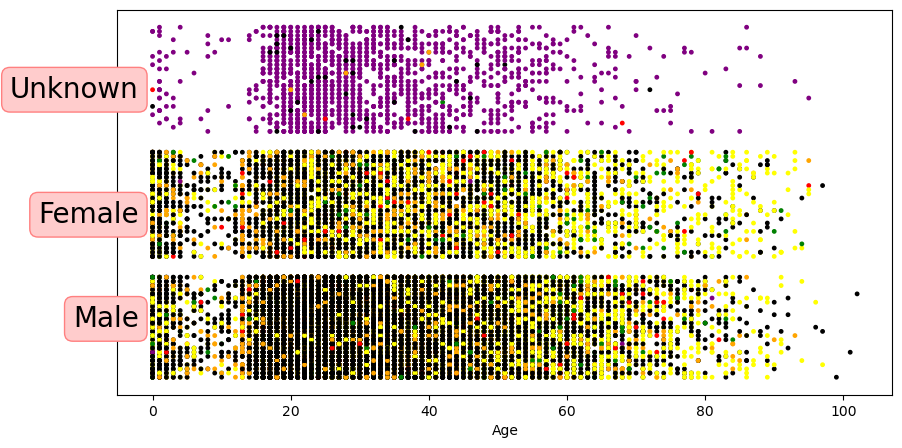

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(age['victim_age'].astype(float), sex, s=6,c=colors_race)
ax.text(-2, 40, "Female", size=20,
         ha="right", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
ax.text(-2, 15, "Male", size=20,
         ha="right", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
ax.text(-2, 70, "Unknown", size=20,
         ha="right", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
ax.set_xlabel('Age')
ax.get_yaxis().set_visible(False)